# Group 10 : Topic 3 MULTI LAYER PERCEPTRON (MLP)

### Necessary imports

In [1]:
import tqdm
import numpy as np
import ast
import os
import sys
import matplotlib.pyplot as plt

## a) Definition of the method

## b) Simple example 

To explain how the MLP works, we will use a simple example using blobs from the sklearn dataset.

First, let's import the right package from sklearn datasets

In [2]:
from sklearn.datasets import make_blobs

Now, let's generate blobs as we did in the Lab 2 : 

In [3]:
x, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
print(x)
print(y)
print(f"the shape of x is {x.shape}")
print(f"the shape of y is {y.shape}")

[[-0.70564499  8.55139891]
 [-0.99796039  3.16403005]
 [ 2.82667347  1.92710249]
 ...
 [-1.01966506  2.80165256]
 [-1.79775432  6.73688929]
 [10.48310534 -3.73727439]]
[3 2 1 1 0 0 4 0 0 1 4 3 1 0 0 0 4 1 0 0 4 4 2 1 2 3 2 3 4 4 0 4 4 1 4 4 1
 3 4 4 1 2 3 1 0 2 0 2 0 3 1 0 3 0 0 4 0 4 0 1 0 4 4 0 0 3 3 1 2 4 2 0 4 2
 1 4 4 1 1 1 3 2 4 2 1 0 3 4 4 0 0 2 3 1 0 0 3 2 2 2 3 2 2 4 2 0 0 4 2 0 0
 0 2 0 1 0 4 2 4 0 0 2 3 3 2 0 1 1 3 4 1 3 1 4 3 0 1 0 0 0 1 4 4 4 2 1 2 0
 3 3 1 0 1 4 1 0 1 0 1 4 3 0 2 3 1 1 0 0 0 0 2 3 4 0 1 4 2 2 1 4 4 1 3 3 0
 3 0 1 0 3 3 3 2 1 3 4 0 4 2 3 2 4 4 1 4 2 3 4 0 3 3 1 4 3 0 3 0 4 3 0 2 2
 1 1 4 1 4 1 0 1 3 4 0 0 3 1 4 4 0 1 0 0 2 4 4 3 1 2 2 0 2 2 1 1 4 4 1 3 0
 1 4 4 0 2 0 1 4 0 2 4 2 0 2 4 4 2 0 4 1 4 4 3 1 1 1 3 3 4 0 4 2 4 0 3 2 2
 3 0 4 3 4 1 1 0 3 1 2 4 1 4 3 1 0 2 0 0 0 4 1 4 0 3 4 0 2 0 4 1 4 4 0 2 2
 3 2 2 1 3 3 2 3 4 0 3 0 4 0 3 1 3 1 3 2 3 1 1 1 4 1 0 4 2 4 4 0 0 0 1 2 4
 2 4 4 3 0 4 1 2 1 2 1 4 1 4 3 4 0 4 2 2 1 4 3 2 3 4 3 1 4 2 3 4 1 1 0 2 4
 4 3 2 

Here, we generated 1000 samples of data (2D) and grouped them into 3 groups. 

Now, let's plot the data according to the cluster they are assigned to.

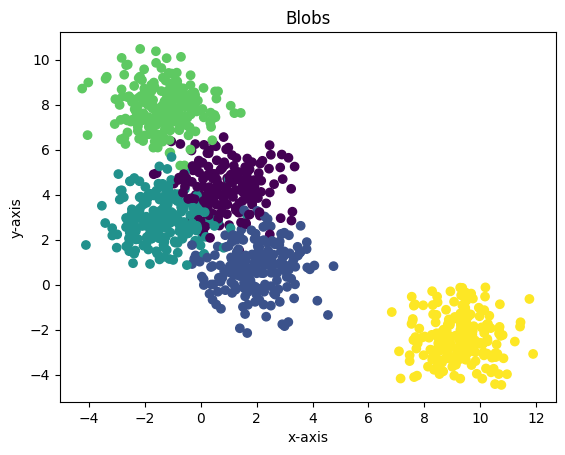

In [4]:
%matplotlib inline
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Blobs")
plt.show()

Now let's train this blobs with the MLP so that it learns how to predict the cluster a data point belongs to.

First, let's import the necessary functions needed to split the data into a training set and a test set.

In [5]:
from sklearn.model_selection import train_test_split

Now, let's divide the data into a training set and a test set : 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Here, the training set represents 80% of the data while the test set represents 20% of the data.

### Use of the Multi Layer Perceptron to classify this dataset

In [7]:
from sklearn.neural_network import MLPClassifier

# creation of the classifier 
classifier = MLPClassifier(random_state = 0, max_iter=300, hidden_layer_sizes = (300,))

# Training the classifier
classifier.fit(x_train, y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(x_train, y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(x_train, y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(x_test, y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(x_test, y_test)}")

Accuracy of the classifier on the training set: 0.9525
Accuracy of the classifier on the test set: 0.95


c:\Users\grego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Impact of parameters on the classifier

# Training of the MLP for Pyrat

## 1) Training of the MLP on several games with the same settings (size = 5 * 7 and number of cheese = 4)

## a) Training with raw data directly imported from the file 

In [8]:
# Load maze configuration and winners data from Lab1
cheeses_npz = np.load("cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]
winners_npz = np.load("winners_500_games_5x7_4.npz")
Y = winners_npz["data"]


In [9]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [10]:
# creation of the classifier 
classifier = MLPClassifier(max_iter=500)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 1.0
Accuracy of the classifier on the test set: 0.58


c:\Users\grego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Here, the major problem is that we might want to predict the winner of a game with different number of cheese and a different grid dimensions. 

So, to overcome this issue, we will set a generic matrix size for the training of model and for the prediction as well. Here, the challenge will be to reshape the cheeses vectors without loosing informations.

Today, our study will concentrate on grid size from 2x2 to 40x40. 

Then the size of the matrices will be of 40x40.

## b) Training with a generic matrix shape of 40x40

In [11]:
# transformation of the vectors into a matrix
new_shape = (500, 5, 7)
X = X.reshape(new_shape)

In [12]:
def matrix_formating_v1(initial_matrix, new_number_of_lines, new_number_of_columns):
    initial_number_of_lines, initial_number_of_columns = initial_matrix.shape
    
    # Compute the number of zeros to add to the initial matrix
    pad_lines = max(0, new_number_of_lines - initial_number_of_lines)
    pad_columns = max(0, new_number_of_columns - initial_number_of_columns)
    
    # Calculate the space needed between new uper corner and old uper corner
    space_lines = pad_lines // 2
    space_columns = pad_columns // 2
    
    # Ajouter zeros around the initial matrix
    new_matrix = np.pad(initial_matrix, ((space_lines, pad_lines - space_lines),
                                                (space_columns, pad_columns - space_columns)),
                                                mode='constant')
    return new_matrix

def matrix_formating_v2(initial_matrix, new_number_of_lines, new_number_of_columns):
    initial_number_of_lines, initial_number_of_columns = initial_matrix.shape
    ratio_lines = new_number_of_lines / initial_number_of_lines
    ratio_columns = new_number_of_columns / initial_number_of_columns
    
    new_matrix = np.zeros((new_number_of_lines, new_number_of_columns), dtype=int)
    for i in range(new_number_of_lines):
        for j in range(new_number_of_columns):
            origine_i = int(i / ratio_lines)
            origine_j = int(j / ratio_columns)
            new_matrix[i][j] = initial_matrix[origine_i][origine_j]
    return new_matrix

def get_data_ready_to_be_predicted(file, nb_lines, nb_columns):
    X = file["cheeses"]
    Y = file["winners"]
    nb_games = file['cheeses'].shape[0]
    new_shape = (nb_games, nb_lines, nb_columns)
    X = np.array(X).reshape(new_shape)
    new_shape = (nb_games, 40, 40)
    X_formatted = np.zeros(new_shape, dtype=int)
    for i in range(nb_games):
        X_formatted[i] = matrix_formating_v1(X[i], 40, 40)
    flat_vector =  np.zeros((nb_games, 40*40), dtype=int)
    for i in range(nb_games):
        flat_vector[i] = X_formatted[i].reshape(-1)
    return flat_vector, Y

In [13]:
# Definition of the new array size
formatted_size = (500, 40, 40)

# Creation of a null array that will be filled latter
X_formatted = np.zeros(formatted_size, dtype=int)

# Going through all matrices in the initial array
for i in range(500):
    X_formatted[i] = matrix_formating_v1(X[i], 40, 40)

# definition of a flat array because the learning usueally takes vectors instead of matrices
flat_vector = np.zeros((500, 40*40), dtype=int)

# Filling every vector with the flatten matrix reshaped
for i in range(500):
    flat_vector[i] = X_formatted[i].reshape(-1)


In [14]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(flat_vector, Y, test_size=0.2, random_state=0)

In [15]:
# creation of the classifier 
classifier = MLPClassifier(max_iter=500)

# Training the classifier
classifier.fit(X_train, Y_train)

# Accuracy of the classifier on the training set
training_set_accuracy = classifier.score(X_train, Y_train)
print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 1.0
Accuracy of the classifier on the test set: 0.57


c:\Users\grego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The good new is that this version of the classifier is able to predict the test values with the same accuracy as the non formatted version. This tells us that the formatting of matrix is not that bad. However, we can see that the accuracy on the test set is not really good. In order to improve this, we will train the classifier with different types of parameters and keep the one with the best test accuracy : 

In [16]:
from itertools import product
from tqdm import tqdm

def train_parameter_combinations(X_train, Y_train, X_test, Y_test, max_iters, neurons, hidden_layers, activations, batch_size=32):
    results = {}

    total_iterations = len(max_iters) * len(neurons) * len(hidden_layers) * len(activations)
    
    with tqdm(total=total_iterations, desc="Progress", unit="combination") as pbar:
        for max_iter, neuron, hidden_layer, activation in product(max_iters, neurons, hidden_layers, activations):
            classifier = MLPClassifier(max_iter=max_iter, hidden_layer_sizes=(neuron,) * hidden_layer, activation=activation, batch_size=batch_size)

            classifier.fit(X_train, Y_train)

            train_accuracy = classifier.score(X_train, Y_train)

            test_accuracy = classifier.score(X_test, Y_test)

            results[(max_iter, neuron, hidden_layer, activation)] = (train_accuracy, test_accuracy)
            pbar.update(1)
    return results

In [17]:
max_iters = [300, 600, 900]
neurons = [50, 150, 250]
hidden_layers = [1, 3, 5]
activations = ['logistic', 'relu', 'tanh']
results = train_parameter_combinations(X_train, Y_train, X_test, Y_test, max_iters, neurons, hidden_layers, activations, 32)
top_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
print(top_results)


Progress:   1%|          | 1/81 [00:06<09:05,  6.82s/combination]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
Progress:   6%|▌         | 5/81 [00:30<06:48,  5.37s/combination]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
Progress: 100%|██████████| 81/81 [17:02<00:00, 12.62s/combination]

[((600, 150, 5, 'relu'), (1.0, 0.7)), ((300, 250, 5, 'relu'), (1.0, 0.63)), ((600, 250, 3, 'relu'), (1.0, 0.63)), ((300, 50, 3, 'relu'), (1.0, 0.61)), ((600, 250, 5, 'relu'), (1.0, 0.61)), ((900, 50, 5, 'relu'), (1.0, 0.61)), ((900, 150, 3, 'relu'), (1.0, 0.61)), ((600, 250, 3, 'logistic'), (0.7575, 0.6)), ((300, 150, 5, 'relu'), (1.0, 0.59)), ((600, 50, 5, 'relu'), (1.0, 0.59)), ((900, 50, 3, 'logistic'), (0.79, 0.59)), ((900, 50, 3, 'relu'), (1.0, 0.59)), ((900, 150, 3, 'tanh'), (1.0, 0.59)), ((900, 150, 5, 'relu'), (1.0, 0.59)), ((900, 250, 1, 'relu'), (1.0, 0.59)), ((300, 50, 3, 'logistic'), (0.795, 0.58)), ((300, 250, 3, 'logistic'), (0.7775, 0.58)), ((600, 50, 5, 'tanh'), (0.99, 0.58)), ((600, 250, 3, 'tanh'), (0.765, 0.58)), ((900, 150, 5, 'tanh'), (1.0, 0.58)), ((900, 250, 3, 'relu'), (1.0, 0.58)), ((300, 250, 1, 'tanh'), (0.77, 0.57)), ((600, 50, 3, 'logistic'), (0.8025, 0.57)), ((600, 50, 3, 'relu'), (1.0, 0.57)), ((600, 150, 1, 'logistic'), (0.77, 0.57)), ((600, 150, 1, 'tan

In [18]:
best_max_iter = top_results[0][0][0]
best_neuron = top_results[0][0][1]
best_hidden_layer = top_results[0][0][2]
best_activation = top_results[0][0][3]

classifier = MLPClassifier(max_iter=best_max_iter, hidden_layer_sizes=(best_neuron,) * best_hidden_layer, activation=best_activation, batch_size=32)

classifier.fit(X_train, Y_train)
train_accuracy = classifier.score(X_train, Y_train)
test_accuracy = classifier.score(X_test, Y_test)

print(f"Train accuracy : {train_accuracy}")
print(f"Test accuracy : {test_accuracy}")

Train accuracy : 1.0
Test accuracy : 0.54


## c) Some predictions

Once this is done, we would like to use the model to predict some winners for : 
- the same game configuration 
- the same game configuration but with different numbers of cheese
- the same game configuration but with different heights
- the same game configuration but with different widths
- a completely different game configuration

Let's keep in mind that the games are running with two greedy algorithms.

### i) prediction with the same configuration

In [19]:
# Variable definitions 
same_configuration_accuracy = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/NORMAL/"
file_path = f"{dataset_folder}/normal.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    same_configuration_accuracy = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier on the same configuration: {same_configuration_accuracy}")


Accuracy of the classifier on the same configuration: 0.912


### ii) prediction with the same configuration but with different numbers of cheese

In [20]:
# Variable definitions 
cheese_accuracy_1 = 0
cheese_accuracy_8 = 0
cheese_accuracy_15= 0
cheese_accuracy_22= 0
cheese_accuracy_30= 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_CHEESE/"

# 1 cheese
file_path = f"{dataset_folder}/1_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_1 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_1}")

# 8 cheese 
file_path = f"{dataset_folder}/8_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_8 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_8}")

# 15 cheese 
file_path = f"{dataset_folder}/15_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_15 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_15}")

# 22 cheese 
file_path = f"{dataset_folder}/22_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_22 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_22}")

# 30 cheese 
file_path = f"{dataset_folder}/30_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_30}")


Accuracy of the classifier: 0.68
Accuracy of the classifier: 0.6
Accuracy of the classifier: 0.36
Accuracy of the classifier: 0.48
Accuracy of the classifier: 0.54


### iii) prediction with the same configuration but with different heights

In [21]:
# Variable definitions 
height_accuracy_2 = 0
height_accuracy_11 = 0
height_accuracy_21 = 0
height_accuracy_30 = 0
height_accuracy_40 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_HEIGHT/"

# 2 height
file_path = f"{dataset_folder}/2_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,2)
    height_accuracy_2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_2}")

# 11 height
file_path = f"{dataset_folder}/11_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,11)
    height_accuracy_11 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_11}")

# 21 height
file_path = f"{dataset_folder}/21_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,21)
    height_accuracy_21 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_21}")

# 30 height
file_path = f"{dataset_folder}/30_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,30)
    height_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_30}")

# 40 height
file_path = f"{dataset_folder}/40_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,40)
    height_accuracy_40 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_40}")


Accuracy of the classifier: 0.34
Accuracy of the classifier: 0.42
Accuracy of the classifier: 0.34
Accuracy of the classifier: 0.5
Accuracy of the classifier: 0.44


### iiii) prediction with the same configuration but with different widths

In [22]:
# Variable definitions 
width_accuracy_2 = 0
width_accuracy_11 = 0
width_accuracy_21 = 0
width_accuracy_30 = 0
width_accuracy_40 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_WIDTH/"

# 2 width
file_path = f"{dataset_folder}/2_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 2,7)
    width_accuracy_2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_2}")

# 11 width
file_path = f"{dataset_folder}/11_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 11,7)
    width_accuracy_11 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_11}")

# 21 width
file_path = f"{dataset_folder}/21_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 21,7)
    width_accuracy_21 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_21}")

# 30 width
file_path = f"{dataset_folder}/30_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 30,7)
    width_accuracy_30 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_30}")

# 40 width
file_path = f"{dataset_folder}/40_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 40,7)
    width_accuracy_40 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_40}")


Accuracy of the classifier: 0.44
Accuracy of the classifier: 0.46
Accuracy of the classifier: 0.42
Accuracy of the classifier: 0.38
Accuracy of the classifier: 0.36


### iiiii) prediction with a completely different game configuration

In [23]:
import re

# Variable definitions 
random_accuracy = 0
X_concat = []
Y_concat = []

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/RANDOM/"
files = os.listdir(dataset_folder)
for filename in files:
    match = re.match(r'.*_(\d+)x(\d+)\.npz', filename)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    file = np.load(f"{dataset_folder}/{filename}")
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, width,height)
    for vector, y in zip(X_formatted, Y_formatted):
        X_concat.append(vector)
        Y_concat.append(y)
random_accuracy = classifier.score(X_concat, Y_concat)
print(f"Accuracy of the classifier: {random_accuracy}")



Accuracy of the classifier: 0.21611111111111111


## d) conclusion 

To conclude, let's plot some charts 

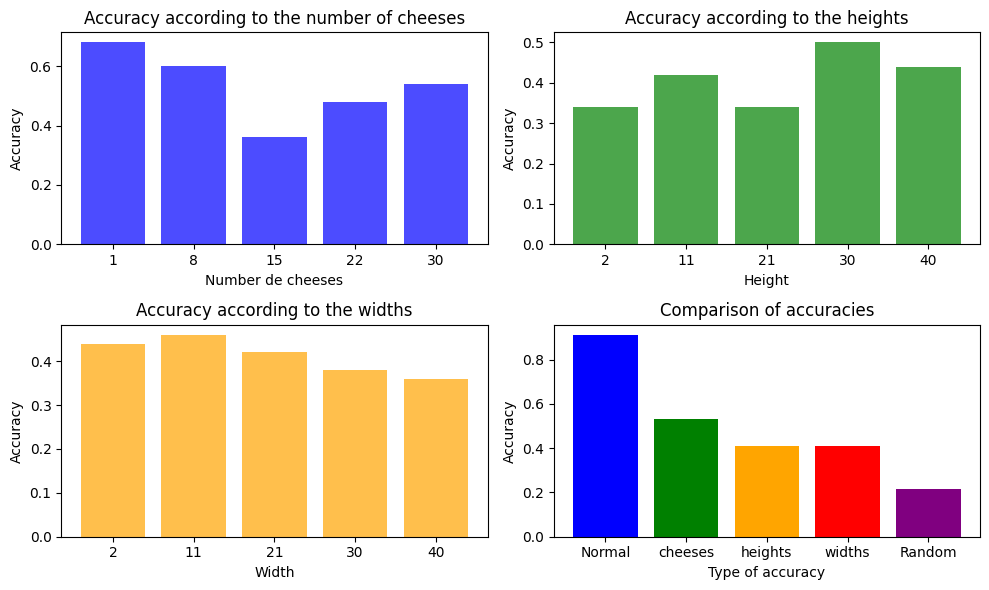

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple
cheese_accuracy_data = [cheese_accuracy_1, cheese_accuracy_8, cheese_accuracy_15, cheese_accuracy_22, cheese_accuracy_30]
height_accuracy_data = [height_accuracy_2, height_accuracy_11, height_accuracy_21, height_accuracy_30, height_accuracy_40]
width_accuracy_data = [width_accuracy_2, width_accuracy_11, width_accuracy_21, width_accuracy_30, width_accuracy_40]
normal_accuracy = same_configuration_accuracy
random_accuracy = random_accuracy

# Tracer les barres
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(range(len(cheese_accuracy_data)), cheese_accuracy_data, color='blue', alpha=0.7)
plt.xticks(range(len(cheese_accuracy_data)), ['1', '8', '15', '22', '30'])
plt.title('Accuracy according to the number of cheeses')
plt.xlabel('Number de cheeses')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(range(len(height_accuracy_data)), height_accuracy_data, color='green', alpha=0.7)
plt.xticks(range(len(height_accuracy_data)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy according to the heights')
plt.xlabel('Height')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.bar(range(len(width_accuracy_data)), width_accuracy_data, color='orange', alpha=0.7)
plt.xticks(range(len(width_accuracy_data)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy according to the widths')
plt.xlabel('Width')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.bar(['Normal', 'cheeses', 'heights', 'widths', 'Random'],
        [normal_accuracy, np.mean(cheese_accuracy_data), np.mean(height_accuracy_data), np.mean(width_accuracy_data), random_accuracy],
        color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparison of accuracies')
plt.xlabel('Type of accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


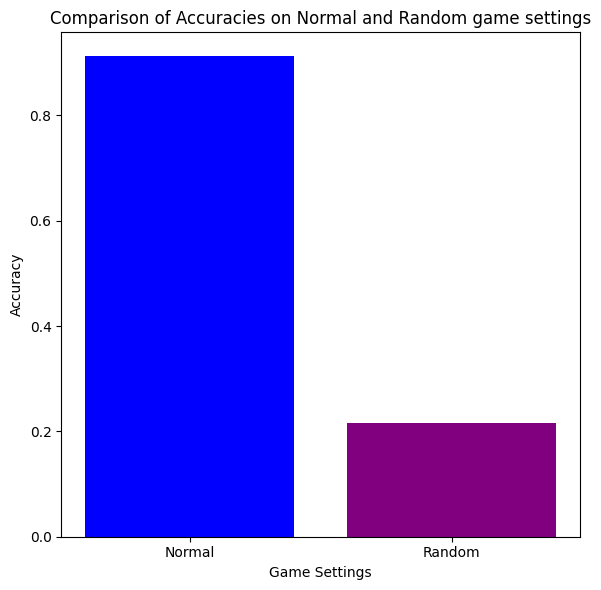

In [25]:
# Tracer les barres
plt.figure(figsize=(6, 6))

plt.bar(['Normal', 'Random'], [normal_accuracy, random_accuracy], color=['blue', 'purple'])
plt.title('Comparison of Accuracies on Normal and Random game settings')
plt.xlabel('Game Settings')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# 2) Training of the MLP on several games with different number of cheese, height and width to improve the generalization

This time we will train the MLP with a lot of 117 files representing for each one of them a 100 games with all different configurationsregarding the number of cheese, the height and the width. 

Our bet is that it might have less accuracy on the test set but it will predict with a better accuracy the winners of random configurations games

## a) Training of the classifier 

In [26]:
X_concat = []
Y_concat = []
dataset_folder = "../../DATASETS_SAILLY_GREGORY/"
nb_games = 100
nb_cheeses = np.linspace(1, 40, 5).astype(int)
maze_widths = np.linspace(2, 40, 5).astype(int) 
maze_heights = np.linspace(2, 40, 5).astype(int) 
for nb_cheese in nb_cheeses:
    for maze_width in maze_widths:
        for maze_height in maze_heights:
            file_path = f"{dataset_folder}/{int(nb_games)}_games_{int(nb_cheese)}_cheeses_{int(maze_width)}x{int(maze_height)}.npz"
            if os.path.exists(file_path):
                file = np.load(file_path)     
                X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, maze_width,maze_height)
                for vector, y in zip(X_formatted, Y_formatted):
                    X_concat.append(vector)
                    Y_concat.append(y)


Once all the files have been concatenated, we can prepare the train and test set : 

In [27]:
# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_concat, Y_concat, test_size=0.2, random_state=0)

Now we can train the model with the same parameters than the previous one just to compare them : 

In [28]:
max_iters = [300]
neurons = [500]
hidden_layers = [5]
activations = ['relu']
results = train_parameter_combinations(X_train, Y_train, X_test, Y_test, max_iters, neurons, hidden_layers, activations, 32)
top_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
print(top_results)

Progress: 100%|██████████| 1/1 [23:40<00:00, 1420.61s/combination]

[((300, 500, 5, 'relu'), (0.9469017094017094, 0.5568376068376069))]


In [29]:
best_max_iter = top_results[0][0][0]
best_neuron = top_results[0][0][1]
best_hidden_layer = top_results[0][0][2]
best_activation = top_results[0][0][3]

classifier = MLPClassifier(max_iter=best_max_iter, hidden_layer_sizes=(best_neuron,) * best_hidden_layer, activation=best_activation, batch_size=32)
classifier.fit(X_train, Y_train)

print(f"Accuracy of the classifier on the training set: {classifier.score(X_train, Y_train)}")

# Accuracy of the classifier on the test set
test_set_accuracy = classifier.score(X_test, Y_test)
print(f"Accuracy of the classifier on the test set: {classifier.score(X_test, Y_test)}")

Accuracy of the classifier on the training set: 0.9433760683760684
Accuracy of the classifier on the test set: 0.5452991452991452


## b) Some predictions

In this section, we will do the same predictions as before. That is to say : 

- the same game configuration (expected to be a bit less accurate)
- the same game configuration but with different numbers of cheese (expected a bit more accurate)
- the same game configuration but with different heights (expected a bit more accurate)
- the same game configuration but with different widths (expected a bit more accurate)
- a completely different game configuration (expected a bit more accurate)

### i) prediction with the same configuration

In [30]:
# Variable definitions 
same_configuration_accuracy_v2 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/NORMAL/"
file_path = f"{dataset_folder}/normal.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    same_configuration_accuracy_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier on the same configuration: {same_configuration_accuracy_v2}")

Accuracy of the classifier on the same configuration: 0.356


### ii) prediction with the same configuration but with different numbers of cheese

In [31]:
# Variable definitions 
cheese_accuracy_1_v2 = 0
cheese_accuracy_8_v2 = 0
cheese_accuracy_15_v2= 0
cheese_accuracy_22_v2= 0
cheese_accuracy_30_v2= 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_CHEESE/"

# 1 cheese
file_path = f"{dataset_folder}/1_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_1_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_1_v2}")

# 8 cheese 
file_path = f"{dataset_folder}/8_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_8_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_8_v2}")

# 15 cheese 
file_path = f"{dataset_folder}/15_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_15_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_15_v2}")

# 22 cheese 
file_path = f"{dataset_folder}/22_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_22_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_22_v2}")

# 30 cheese 
file_path = f"{dataset_folder}/30_cheeses.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,7)
    cheese_accuracy_30_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {cheese_accuracy_30_v2}")

Accuracy of the classifier: 0.38
Accuracy of the classifier: 0.5
Accuracy of the classifier: 0.32
Accuracy of the classifier: 0.38
Accuracy of the classifier: 0.26


### iii) prediction with the same configuration but with different heights

In [32]:
# Variable definitions 
height_accuracy_2_v2 = 0
height_accuracy_11_v2 = 0
height_accuracy_21_v2 = 0
height_accuracy_30_v2 = 0
height_accuracy_40_v2 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_HEIGHT/"

# 2 height
file_path = f"{dataset_folder}/2_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,2)
    height_accuracy_2_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_2_v2}")

# 11 height
file_path = f"{dataset_folder}/11_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,11)
    height_accuracy_11_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_11_v2}")

# 21 height
file_path = f"{dataset_folder}/21_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,21)
    height_accuracy_21_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_21_v2}")

# 30 height
file_path = f"{dataset_folder}/30_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,30)
    height_accuracy_30_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_30_v2}")

# 40 height
file_path = f"{dataset_folder}/40_height.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 5,40)
    height_accuracy_40_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {height_accuracy_40_v2}")

Accuracy of the classifier: 0.48


Accuracy of the classifier: 0.34
Accuracy of the classifier: 0.48
Accuracy of the classifier: 0.46
Accuracy of the classifier: 0.6


### iiii) prediction with the same configuration but with different widths

In [33]:
# Variable definitions 
width_accuracy_2_v2 = 0
width_accuracy_11_v2 = 0
width_accuracy_21_v2 = 0
width_accuracy_30_v2 = 0
width_accuracy_40_v2 = 0

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/CHANGE_WIDTH/"

# 2 width
file_path = f"{dataset_folder}/2_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 2,7)
    width_accuracy_2_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_2_v2}")

# 11 width
file_path = f"{dataset_folder}/11_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 11,7)
    width_accuracy_11_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_11_v2}")

# 21 width
file_path = f"{dataset_folder}/21_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 21,7)
    width_accuracy_21_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_21_v2}")

# 30 width
file_path = f"{dataset_folder}/30_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 30,7)
    width_accuracy_30_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_30_v2}")

# 40 width
file_path = f"{dataset_folder}/40_width.npz"
if os.path.exists(file_path):
    file = np.load(file_path)
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, 40,7)
    width_accuracy_40_v2 = classifier.score(X_formatted, Y_formatted)
    print(f"Accuracy of the classifier: {width_accuracy_40_v2}")

Accuracy of the classifier: 0.36
Accuracy of the classifier: 0.44
Accuracy of the classifier: 0.38
Accuracy of the classifier: 0.32
Accuracy of the classifier: 0.42


### iiiii) prediction with a completely different game configuration


In [34]:
import re

# Variable definitions 
random_accuracy_v2 = 0
X_concat = []
Y_concat = []

# Open file(s) 
dataset_folder = "../../DATASETS_SUPERVISED_LEARNING/RANDOM/"
files = os.listdir(dataset_folder)
for filename in files:
    match = re.match(r'.*_(\d+)x(\d+)\.npz', filename)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    file = np.load(f"{dataset_folder}/{filename}")
    X_formatted,Y_formatted = get_data_ready_to_be_predicted(file, width,height)
    for vector, y in zip(X_formatted, Y_formatted):
        X_concat.append(vector)
        Y_concat.append(y)
random_accuracy_v2 = classifier.score(X_concat, Y_concat)
print(f"Accuracy of the classifier: {random_accuracy_v2}")

Accuracy of the classifier: 0.67


## c) Conclusion

To conclude, let's plot some charts 

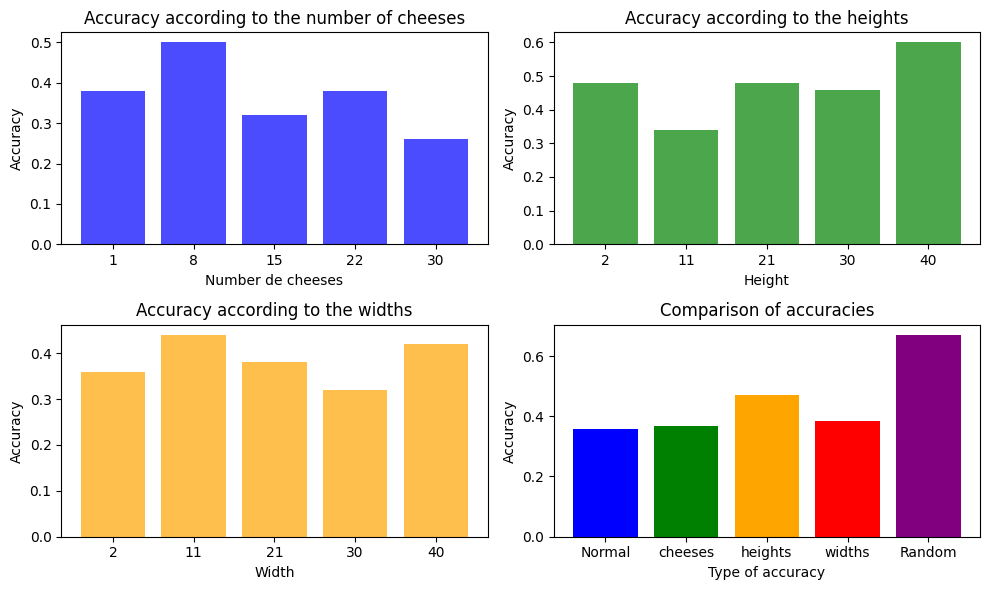

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple
cheese_accuracy_data_v2 = [cheese_accuracy_1_v2, cheese_accuracy_8_v2, cheese_accuracy_15_v2, cheese_accuracy_22_v2, cheese_accuracy_30_v2]
height_accuracy_data_v2 = [height_accuracy_2_v2, height_accuracy_11_v2, height_accuracy_21_v2, height_accuracy_30_v2, height_accuracy_40_v2]
width_accuracy_data_v2 = [width_accuracy_2_v2, width_accuracy_11_v2, width_accuracy_21_v2, width_accuracy_30_v2, width_accuracy_40_v2]
normal_accuracy_v2 = same_configuration_accuracy_v2
random_accuracy_v2 = random_accuracy_v2

# Tracer les barres
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(range(len(cheese_accuracy_data_v2)), cheese_accuracy_data_v2, color='blue', alpha=0.7)
plt.xticks(range(len(cheese_accuracy_data_v2)), ['1', '8', '15', '22', '30'])
plt.title('Accuracy according to the number of cheeses')
plt.xlabel('Number de cheeses')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(range(len(height_accuracy_data_v2)), height_accuracy_data_v2, color='green', alpha=0.7)
plt.xticks(range(len(height_accuracy_data_v2)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy according to the heights')
plt.xlabel('Height')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.bar(range(len(width_accuracy_data_v2)), width_accuracy_data_v2, color='orange', alpha=0.7)
plt.xticks(range(len(width_accuracy_data_v2)), ['2', '11', '21', '30', '40'])
plt.title('Accuracy according to the widths')
plt.xlabel('Width')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.bar(['Normal', 'cheeses', 'heights', 'widths', 'Random'],
        [normal_accuracy_v2, np.mean(cheese_accuracy_data_v2), np.mean(height_accuracy_data_v2), np.mean(width_accuracy_data_v2), random_accuracy_v2],
        color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparison of accuracies')
plt.xlabel('Type of accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

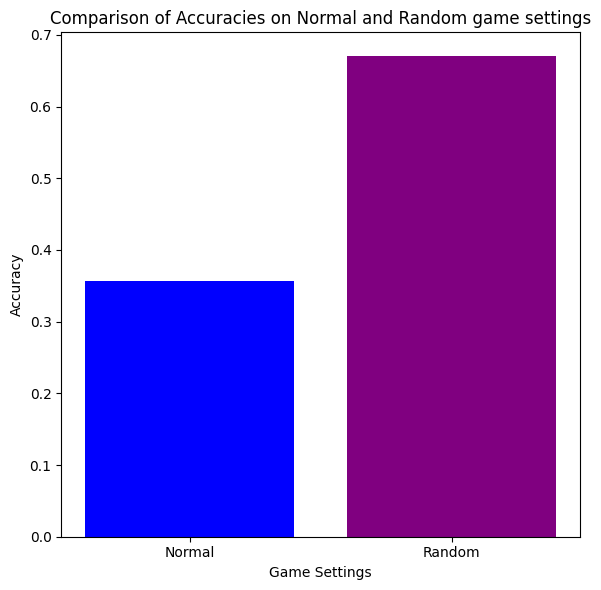

In [36]:
# Tracer les barres
plt.figure(figsize=(6, 6))

plt.bar(['Normal', 'Random'], [normal_accuracy_v2, random_accuracy_v2], color=['blue', 'purple'])
plt.title('Comparison of Accuracies on Normal and Random game settings')
plt.xlabel('Game Settings')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

Let's try to compare these results with the previous ones : 

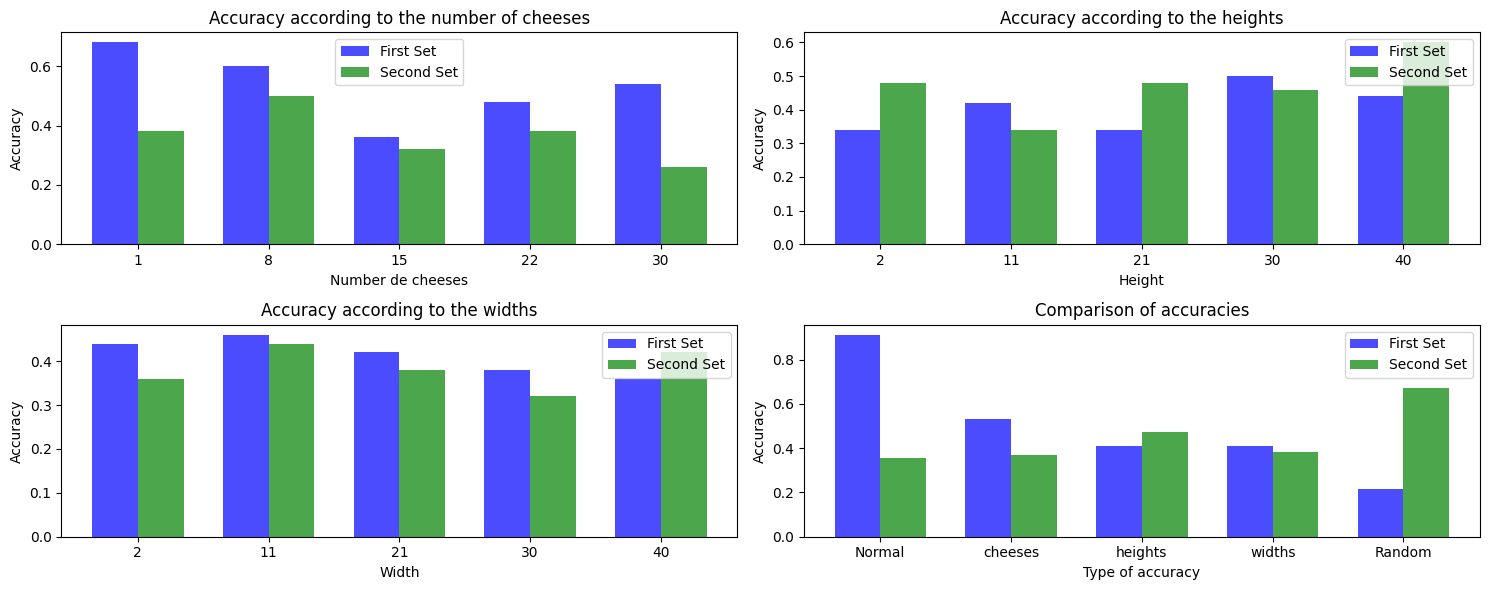

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple pour le premier ensemble
cheese_accuracy_data = [cheese_accuracy_1, cheese_accuracy_8, cheese_accuracy_15, cheese_accuracy_22, cheese_accuracy_30]
height_accuracy_data = [height_accuracy_2, height_accuracy_11, height_accuracy_21, height_accuracy_30, height_accuracy_40]
width_accuracy_data = [width_accuracy_2, width_accuracy_11, width_accuracy_21, width_accuracy_30, width_accuracy_40]
normal_accuracy = same_configuration_accuracy
random_accuracy = random_accuracy

# Données d'exemple pour le deuxième ensemble
cheese_accuracy_data_v2 = [cheese_accuracy_1_v2, cheese_accuracy_8_v2, cheese_accuracy_15_v2, cheese_accuracy_22_v2, cheese_accuracy_30_v2]
height_accuracy_data_v2 = [height_accuracy_2_v2, height_accuracy_11_v2, height_accuracy_21_v2, height_accuracy_30_v2, height_accuracy_40_v2]
width_accuracy_data_v2 = [width_accuracy_2_v2, width_accuracy_11_v2, width_accuracy_21_v2, width_accuracy_30_v2, width_accuracy_40_v2]
normal_accuracy_v2 = same_configuration_accuracy_v2
random_accuracy_v2 = random_accuracy_v2

# Définir la largeur des barres
bar_width = 0.35

# Créer une plage pour les positions sur l'axe x
index = np.arange(len(cheese_accuracy_data))

# Tracer les barres
plt.figure(figsize=(15, 6))

# Premier ensemble de graphiques
plt.subplot(2, 2, 1)
plt.bar(index, cheese_accuracy_data, bar_width, color='blue', alpha=0.7, label='First Set')
plt.bar(index + bar_width, cheese_accuracy_data_v2, bar_width, color='green', alpha=0.7, label='Second Set')
plt.xlabel('Number de cheeses')
plt.ylabel('Accuracy')
plt.title('Accuracy according to the number of cheeses')
plt.xticks(index + bar_width / 2, ['1', '8', '15', '22', '30'])
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(index, height_accuracy_data, bar_width, color='blue', alpha=0.7, label='First Set')
plt.bar(index + bar_width, height_accuracy_data_v2, bar_width, color='green', alpha=0.7, label='Second Set')
plt.xlabel('Height')
plt.ylabel('Accuracy')
plt.title('Accuracy according to the heights')
plt.xticks(index + bar_width / 2, ['2', '11', '21', '30', '40'])
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(index, width_accuracy_data, bar_width, color='blue', alpha=0.7, label='First Set')
plt.bar(index + bar_width, width_accuracy_data_v2, bar_width, color='green', alpha=0.7, label='Second Set')
plt.xlabel('Width')
plt.ylabel('Accuracy')
plt.title('Accuracy according to the widths')
plt.xticks(index + bar_width / 2, ['2', '11', '21', '30', '40'])
plt.legend()

plt.subplot(2, 2, 4)
bar_width = 0.35
plt.bar(index - bar_width/2, 
        [normal_accuracy, np.mean(cheese_accuracy_data), np.mean(height_accuracy_data), np.mean(width_accuracy_data), random_accuracy],
        bar_width, color='blue', alpha=0.7, label='First Set')
plt.bar(index + bar_width/2, 
        [normal_accuracy_v2, np.mean(cheese_accuracy_data_v2), np.mean(height_accuracy_data_v2), np.mean(width_accuracy_data_v2), random_accuracy_v2],
        bar_width, color='green', alpha=0.7, label='Second Set')
plt.title('Comparison of accuracies')
plt.xlabel('Type of accuracy')
plt.ylabel('Accuracy')
plt.xticks(index, ['Normal', 'cheeses', 'heights', 'widths', 'Random'])
plt.legend()
plt.tight_layout()
plt.show()

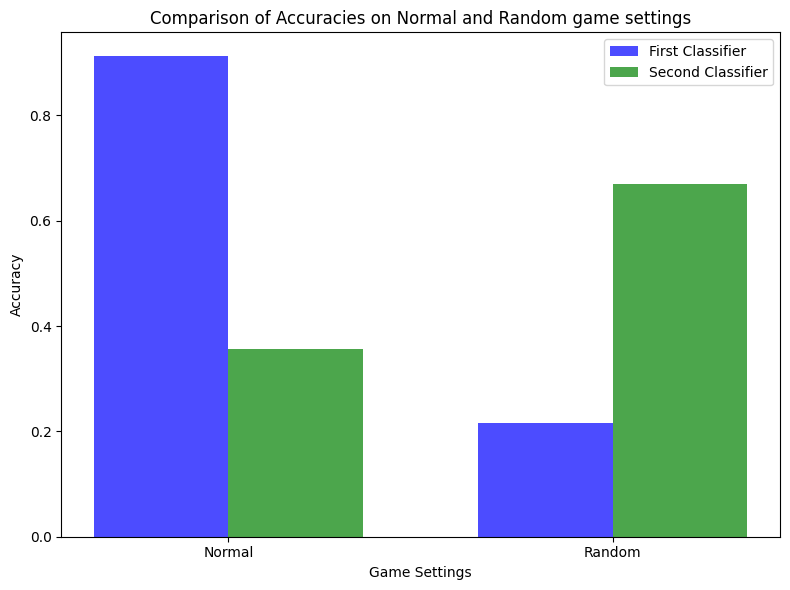

In [39]:
# Définir la largeur des barres
bar_width = 0.35

# Créer une plage pour les positions sur l'axe x
index = np.arange(2)

# Tracer les barres
plt.figure(figsize=(8, 6))

plt.bar(index, [normal_accuracy, random_accuracy], bar_width, color='blue', alpha=0.7, label='First Classifier')
plt.bar(index + bar_width, [normal_accuracy_v2, random_accuracy_v2], bar_width, color='green', alpha=0.7, label='Second Classifier')

plt.title('Comparison of Accuracies on Normal and Random game settings')
plt.xlabel('Game Settings')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, ['Normal', 'Random'])
plt.legend()
plt.tight_layout()
plt.show()